### **Importing all needed libraries**

In [148]:
#Importing all needed libraries
import pandas as pd
import numpy as np #Matric math
import tensorflow as tf #ML
from tensorflow.python.framework import ops
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sys
import os
from scipy.io import loadmat
from scipy.io import loadmat

# sys.path.append(os.path.abspath("/Users/henda/anaconda3/Lib/site-packages"))
# from rnn_utils import *
# from public_tests import *
ops.reset_default_graph()

tf.compat.v1.reset_default_graph() #Clearning cache
sess=tf.compat.v1.InteractiveSession()




ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


### **Import Training Data**

In [149]:
def load_files():
    full_data = pd.DataFrame()
    subjects_to_load = [1,2,3,4,5,6,7,8,9]
    last_value = 0  # Initialize the last value for column 0

    for i in subjects_to_load:
        mat = loadmat(f'/content/sample_data/Sub2sub {i}_Test.mat')
        data = pd.DataFrame(mat[f'Data{1}'])
        sc=data.iloc [:,[0,1,2,3,4, 5, 6, 7,8,9]]
        sc.iloc[:,0]=sc.iloc[:,0]+last_value
        last_value=sc.iloc[:,0].iloc[-1]
        sc['subject_num'] = [i] * len(sc)
        full_data = pd.concat([full_data, sc])
    return full_data

In [150]:
Data1 = load_files()
Data1

<ipython-input-149-0fc8b5622348>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc['subject_num'] = [i] * len(sc)


,0,1,2,3,4,5,6,7,8,9,subject_num
0,6.382944e+01,0.281690,0.489741,0.510686,0.007947,0.005985,0.011474,0.960326,0.354871,0.998716,1
1,1.506855e+02,0.281466,0.490153,0.510489,0.002410,0.005748,0.013646,0.941707,0.354519,0.998754,1
2,2.502471e+02,0.281326,0.490547,0.510161,0.006262,0.006098,0.009462,0.957901,0.354532,0.998865,1
3,3.500264e+02,0.281425,0.490610,0.509903,0.007739,0.003593,0.009989,0.940461,0.354570,0.998972,1
4,4.495862e+02,0.281496,0.490560,0.509720,0.011756,0.007291,0.014906,0.946249,0.354609,0.999221,1
...,...,...,...,...,...,...,...,...,...,...,...
6013,8.174205e+06,0.853787,0.455856,0.341949,0.420770,0.128242,0.160606,0.937563,0.750912,0.279866,9
6014,8.174304e+06,0.823726,0.374781,0.370950,0.259622,0.100530,0.096204,0.944815,0.717646,0.313202,9
6015,8.174404e+06,0.769950,0.305892,0.390527,0.197912,0.180758,0.139561,0.927472,0.658147,0.366712,9
6016,8.174503e+06,0.687477,0.250219,0.402669,0.319836,0.124434,0.136410,0.932194,0.584930,0.439887,9


Text(0.5, 1.0, 'Lateral Deltoid EMg signal')

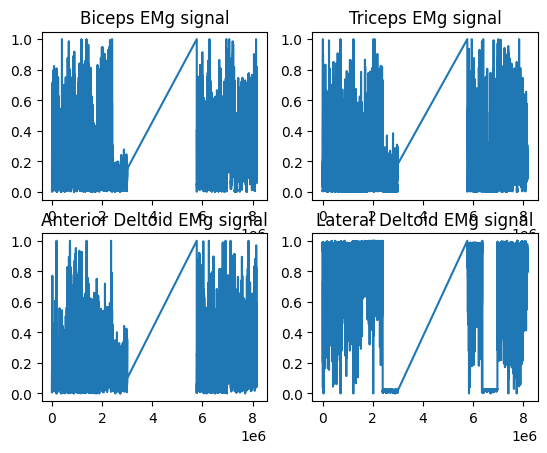

In [151]:
#Reading the training data Subject
# training_data = loadmat(r"/content/sample_data/Top3_Train.mat")

# Data1=training_data["Data1"]
Data1=np.array(Data1)

Time=Data1[0:(len(Data1))-3,0]
X=Data1[3:len(Data1),[1,2, 8 ,9]]
Z=Data1[0:(len(Data1))-3,[4 ,5 ,6 ,7]]


del Data1
#####################################################

input_train=Z
output_train=X
time_train=Time



#printing the data
%matplotlib inline
figure, axis = plt.subplots(2, 2)


axis[0, 0].plot(time_train,input_train[:,0])
axis[0, 0].set_title('Biceps EMg signal')

axis[0, 1].plot(time_train,input_train[:,1])
axis[0, 1].set_title('Triceps EMg signal')

axis[1, 0].plot(time_train,input_train[:,2])
axis[1, 0].set_title('Anterior Deltoid EMg signal')

axis[1, 1].plot(time_train,input_train[:,3])
axis[1, 1].set_title('Lateral Deltoid EMg signal')

### **Import Test Data**

Text(0.5, 1.0, 'Lateral Deltoid EMg signal')

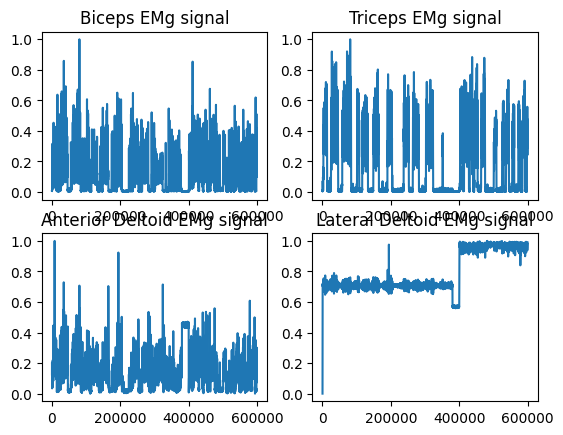

In [152]:
#Reading the test data
test_data = loadmat(r"/content/sample_data/Sub2sub 10_Test.mat")

Data1=test_data["Data1"]
Data1=np.array(Data1)


Time=Data1[0:(len(Data1))-3,0]
X=Data1[3:len(Data1),[1,2, 8 ,9]]
Z=Data1[0:(len(Data1))-3,[4 ,5 ,6 ,7]]


del Data1
#####################################################

input_test=Z
output_test=X
time_test=Time

# Graphing the data
%matplotlib inline
figure, axis = plt.subplots(2, 2)


axis[0, 0].plot(time_test,input_test[:,0])
axis[0, 0].set_title('Biceps EMg signal')

axis[0, 1].plot(time_test,input_test[:,1])
axis[0, 1].set_title('Triceps EMg signal')

axis[1, 0].plot(time_test,input_test[:,2])
axis[1, 0].set_title('Anterior Deltoid EMg signal')

axis[1, 1].plot(time_test,input_test[:,3])
axis[1, 1].set_title('Lateral Deltoid EMg signal')

### **Checking size of arrays**

In [153]:
#Checking the dimensions of the training and testing data
print(input_train.shape)
print(output_train.shape)

print(input_test.shape)
print(output_test.shape)

#np.set_printoptions(threshold=sys.maxsize)
#print(output_train)


(54150, 4)
(54150, 4)
(6015, 4)
(6015, 4)


### **Reshaping of Training dataset**

In [154]:

# Assume data is your input array of shape (54151, 4)
sequence_length = 25
n_features = 4  # Number of features in your data

# Initialize a new array to store the sequences (input_train)
n_sequences = len(input_train) - sequence_length + 1
in_train = np.zeros((n_sequences, sequence_length, n_features))

# Fill the sequences array
for i in range(n_sequences):
    in_train[i] = input_train[i:i+sequence_length]
del n_sequences



    # Initialize a new array to store the sequences (input_test)
n_sequences = len(input_test) - sequence_length + 1
in_test = np.zeros((n_sequences, sequence_length, n_features))

# Fill the sequences array
for i in range(n_sequences):
    in_test[i] = input_test[i:i+sequence_length]

del n_sequences

output_train=output_train[0:len(in_train),:]
print(in_train.shape)
print(output_train.shape)
print(in_test.shape)


(54126, 25, 4)
(54126, 4)
(5991, 25, 4)


### **Seperate Validation Data **

In [155]:
val_data = loadmat(r"/content/sample_data/Sub2sub 1_Test.mat")

Data1=val_data["Data1"]
Data1=np.array(Data1)


Time=Data1[0:(len(Data1))-3,0]
X=Data1[3:len(Data1),[1, 2,8 ,9]]
Z=Data1[0:(len(Data1))-3,[4 ,5 ,6 ,7]]


del Data1
#####################################################

input_val=Z
output_val=X
time_val=Time
del Z
del X
del Time

# Assume data is your input array of shape (54151, 4)
sequence_length = 25
n_features = 4  # Number of features in your data

# Initialize a new array to store the sequences (input_train)
n_sequences = len(input_val) - sequence_length + 1
in_val = np.zeros((n_sequences, sequence_length, n_features))

# Fill the sequences array
for i in range(n_sequences):
    in_val[i] = input_val[i:i+sequence_length]

del n_sequences
del sequence_length
del n_features

out_val=output_val[0:len(in_val),:]

print(in_val.shape)
print(out_val.shape)


(5992, 25, 4)
(5992, 4)


### **Creating model**

In [156]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector
from tensorflow.keras.layers import Attention


# Define your settings
numResponses =4
numHiddenUnits = 200
timesteps = 25  # Number of timesteps (sequence length)
input_features = 4

# model = Sequential([
#     LSTM(numHiddenUnits, return_sequences=False, input_shape=(None, 4)),  # first LSTM layer
#     Dense(50, activation='relu'),  # Dense layer
#     Dropout(0.5),  # Dropout layer
#     RepeatVector(timesteps),  # Repeat the dense output to make it suitable for LSTM input
#     LSTM(numHiddenUnits, return_sequences=False),  # Second LSTM layer
#     Dense(numResponses),  # Final Dense layer for output
# ])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras import activations

# Define optimized CNN-LSTM architecture
model = Sequential()

# 1st convolutional layer
model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', use_bias=False, input_shape=(timesteps, input_features)))  # 15 timesteps, 24 features
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

# 2nd convolutional layer
model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

# 3rd convolutional layer
model.add(Conv1D(128, kernel_size=3, strides=1, padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))


# Dense layer before LSTM
model.add(Dense(100, activation='relu'))

# Bidirectional LSTM layers
model.add((LSTM(400, return_sequences=True)))
model.add(Dropout(0.2))

model.add((LSTM(200)))
model.add(Dropout(0.2))
# Final output layer for predicting 4 degrees of freedom (DOFs)
model.add(Dense(numResponses, activation='relu'))  # Adjust the number of outputs for your case (22 DOFs)

# Print model summary
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_21 (Conv1D)                   │ (None, 25, 32)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 25, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 25, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 25, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 25, 64)              │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 25, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_22 (MaxPooling1D)      │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 25, 128)             │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 25, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 25, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 25, 400)             │         801,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 25, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 200)                 │         480,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,328,104 (5.07 MB)

 Trainable params: 1,327,656 (5.06 MB)

 Non-trainable params: 448 (1.75 KB)

### **Training Model**

In [157]:
#Early stopping to the model to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#Compile the model
model.compile(optimizer='Adam',
            loss='mean_squared_error')


# history=model.fit(in_train,output_train,validation_data=(in_val,out_val),
#                  batch_size=16,
#                  epochs=200,
#                  verbose=1,
#                 callbacks=[early_stopping]

#                  )

history=model.fit(in_train,output_train,validation_split=0.2,
                 batch_size=16,
                 epochs=200,
                 verbose=1,
                callbacks=[early_stopping]

                 )
# Print the model summary
model.summary()

Epoch 1/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - loss: 0.0339 - val_loss: 0.0290
Epoch 2/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0104 - val_loss: 0.0298
Epoch 3/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0085 - val_loss: 0.0286
Epoch 4/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0070 - val_loss: 0.0286
Epoch 5/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0060 - val_loss: 0.0275
Epoch 6/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0052 - val_loss: 0.0283
Epoch 7/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0045 - val_loss: 0.0283
Epoch 8/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0040 - val_loss: 0.0309
Epoch 9/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0038 - val_loss: 0.0294
Epoch 10/200
2707/2707 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.0032 - val_loss: 0.0308


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_21 (Conv1D)                   │ (None, 25, 32)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 25, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 25, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 25, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 25, 64)              │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 25, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_22 (MaxPooling1D)      │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 25, 128)             │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 25, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 25, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 25, 400)             │         801,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 25, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 200)                 │         480,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,983,418 (15.20 MB)

 Trainable params: 1,327,656 (5.06 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,655,314 (10.13 MB)

In [158]:
# keras.utils.plot_model

### **Testing Model**

In [159]:
#Model evaluation on testing dataset
#score=model.evaluate(in_test, output_test)
output_predicted=model.predict(in_test)

print(output_predicted.shape)
print(output_test.shape)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(5991, 4)
(6015, 4)


### **Making sure the size of test and predicted is the same**

In [160]:
# # Initialize a new array to store the sequences (input_test)
# n_sequences = len(output_test) - sequence_length + 1
# out_test = np.zeros((n_sequences, sequence_length, 3))

# # Fill the sequences array
# for i in range(n_sequences):
#     out_test[i] = output_test[i:i+sequence_length]

# del n_sequences
n=len(output_test)-len(output_predicted)
if n==0:
    out_test=output_test
else:
    out_test=output_test[:-n,:]

print(output_predicted.shape)
print(out_test.shape)


(5991, 4)
(5991, 4)


### **Printing the predicted vs actual**

In [161]:
for i in range(len(output_predicted)):
    print("actual=%s, Predicted=%s"%(out_test[i],output_predicted[i]))

Streaming output truncated to the last 5000 lines.
actual=[0.57353935 0.19157399 0.30382562 0.67200069], Predicted=[0.15400912 0.5421977  0.1796086  0.9668184 ]
actual=[0.42978405 0.27603594 0.21409724 0.85167472], Predicted=[0.15018706 0.5384466  0.18126705 0.9731487 ]
actual=[0.35015893 0.39540643 0.18985636 0.95234013], Predicted=[0.15985245 0.5318049  0.19673832 0.9595355 ]
actual=[0.32448516 0.52174172 0.18223639 0.98306774], Predicted=[0.15553495 0.52417177 0.19749212 0.9622259 ]
actual=[0.33863065 0.68378423 0.18448674 0.96746849], Predicted=[0.16371728 0.52578676 0.19826716 0.9596048 ]
actual=[0.44075326 0.83618637 0.22486741 0.84317715], Predicted=[0.1888323  0.52712286 0.20965734 0.9514686 ]
actual=[0.64925947 0.89847605 0.37094653 0.59762109], Predicted=[0.20334546 0.52846557 0.2090551  0.95155364]
actual=[0.84048678 0.80929958 0.61328993 0.38962307], Predicted=[0.23931922 0.52192014 0.2059493  0.9058808 ]
actual=[0.93002434 0.59936923 0.77514011 0.31381927], Predicted=[0.42

### **Getting CC**

In [162]:
#Shifting y to remove delay
# out_t=out_test[1:len(out_test)-5,2]
# out_p=output_predicted[6:len(output_predicted),2]
# output_predicted[:,2]=1-output_predicted[:,2]


In [163]:
# Getting cc
pearson0=np.corrcoef(out_test[:,0],output_predicted[:,0])
print("CC (θ): %s" % pearson0[1,0])

pearson1=np.corrcoef(out_test[:,1],output_predicted[:,1])
print("CC (X): %s" % pearson1[1,0])

pearson2=np.corrcoef(out_test[:,2],output_predicted[:,2])
print("CC (Y): %s" % pearson2[1,0])

pearson3=np.corrcoef(out_test[:,3],output_predicted[:,3])
print("CC (V): %s" % pearson3[1,0])

CC (θ): 0.2724444867252021
CC (X): 0.4831808836883557
CC (Y): 0.38028054810813644
CC (V): 0.6631178375264594


In [164]:
print(pearson0[1,0])

0.2724444867252021


## **Getting RMSE**

In [165]:
from sklearn.metrics import mean_squared_error
import sklearn
import math
mse0 = sklearn.metrics.mean_squared_error(out_test[:,0],output_predicted[:,0])
print("RMSE (θ): %s" % math.sqrt(mse0))

mse1 = sklearn.metrics.mean_squared_error(out_test[:,1],output_predicted[:,1])
print("RMSE(x): %s" % math.sqrt(mse1))

mse2 = sklearn.metrics.mean_squared_error(out_test[:,2],output_predicted[:,2])
print("RMSE(Y): %s" % math.sqrt(mse2))

mse3 = sklearn.metrics.mean_squared_error(out_test[:,3],output_predicted[:,3])
print("RMSE(v): %s" % math.sqrt(mse3))

RMSE (θ): 0.2767767883717526
RMSE(x): 0.16851604105651863
RMSE(Y): 0.2024580888709209
RMSE(v): 0.2177834162731582


In [166]:
time_test=time_test[0:len(output_predicted)]
print(time_test.shape)


(5991,)


### **Save the Results**

In [167]:
#Save the CC data in excel file

import openpyxl
# Load the existing workbook
from google.colab import drive
drive.mount('/content/drive')
workbook_path = '/content/drive/My Drive/Colab Notebooks/dataset/Fraunhofer CNN-LSTM Sub2sub.xlsx'
wb = openpyxl.load_workbook(workbook_path)

cc_means = [
      (pearson0[1,0]),
      (pearson1[1,0]),
      (pearson2[1,0]),
      (pearson3[1,0])
]

mse_means = [
    (math.sqrt((mse0))),
    (math.sqrt((mse1))),
    (math.sqrt((mse2))),
    (math.sqrt((mse3)))
]
# Select the active sheet
sheet = wb.active

row_name = 'Sl10-25'

# Find the row with the specified row name
target_row = None
for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row):
    if row[0].value == row_name:
        target_row = row[0].row
        break

# Check if the target row was found
if target_row:
    # Write the CC mean values to the found row, starting from the second column
    for col, value in enumerate(cc_means, start=2):  # Start at column 2 to skip the label
        sheet.cell(row=target_row, column=col, value=value)
    for col, value in enumerate(mse_means, start=2 + len(cc_means)+1):  # Start after CC columns
        sheet.cell(row=target_row, column=col, value=value)
else:
    print(f"Row '{row_name}' not found in the sheet.")

# Save the workbook
wb.save(workbook_path)
print("Data saved successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved successfully.


### **Drawing Actual vs predicted**

<function matplotlib.pyplot.show(close=None, block=None)>

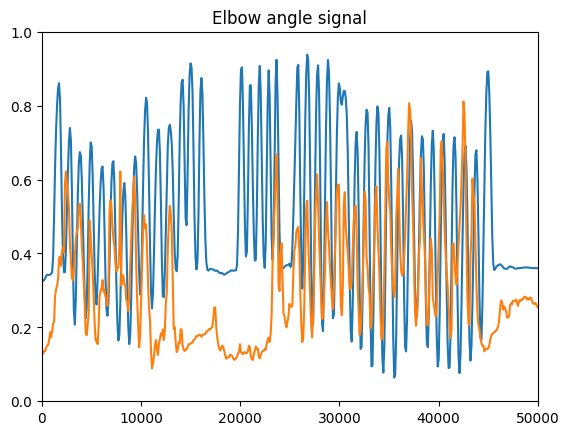

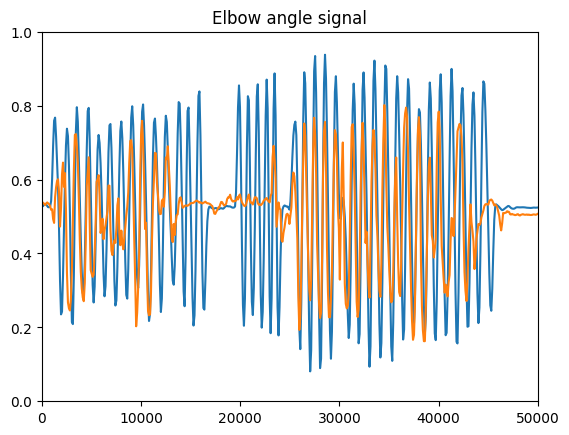

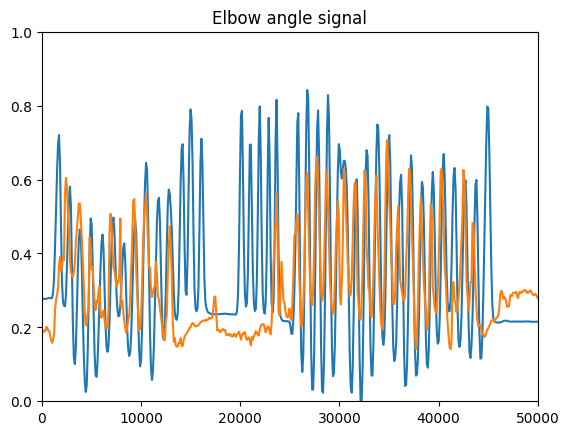

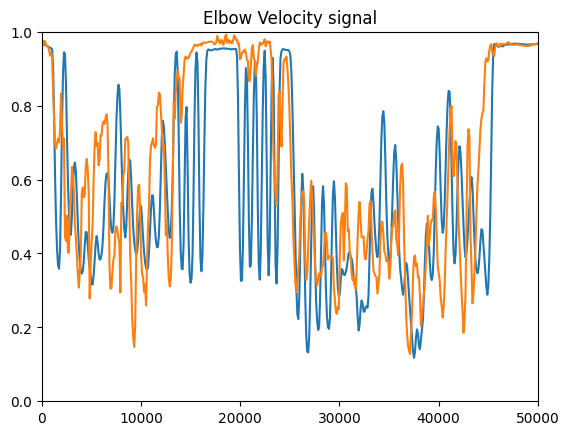

In [168]:
# Graphing the data
%matplotlib inline

fig1 = plt.figure("Figure 1")
plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,0])
plt.plot(time_test,output_predicted[:,0])
plt.title('Elbow angle signal')

fig2 = plt.figure("Figure 2")
plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,1])
plt.plot(time_test,output_predicted[:,1])
plt.title('Elbow angle signal')

fig3 = plt.figure("Figure 3")
plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,2])
plt.plot(time_test,output_predicted[:,2])
# plt.plot(time_test[0:len(out_t)],out_t)
# plt.plot(time_test[0:len(out_p)],out_p)
plt.title('Elbow angle signal')
plt.show

fig3 = plt.figure("Figure 4")
plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,3])
plt.plot(time_test,output_predicted[:,3])
# plt.plot(time_test[0:len(out_t)],out_t)
# plt.plot(time_test[0:len(out_p)],out_p)
plt.title('Elbow Velocity signal')
plt.show
